<h1 style= "color:#9370DB;"> Stock Analysis </h1>

In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# New liabraries. 
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g



### The Stock Analysis Dataset:


**First impressions:**
    
_____________

The **S&P 500** is a stock market index tracking the performance of the largest 500 publicly traded companies listed on U.S. stock exchanges.

Investors have long used the S&P 500 as a benchmark for their investments as it tends to signal overall market health. 
The index is a popular choice for long-term inverstors who wish to watch growth over the coming deacades. 

The dataset contains: 
- S&P 500 **Index**: Contains the daily price of the index, representing the overall performance of the 500 companies in the S&P 500.
- S&P 500 **Stocks**: Includes the daily stock prices for each company within the index, providing insights into individual stock movements. 
- S&P 500 **Companies**: Provides detailed information about each company, including metrics such as Name, Sector, Marketcap, Ebitda, Weight.

The data types are even: (13 int or float / 13 objects).

Our **project goal** is to identify the performance of various sectors in the S&P 500. After reading the [documentation](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks) we will proceed with the following **strategy**:

1. The **target** of our dataset will be `currentprice`, which is the actual price of the stock right now.
2. Through **Exploratory Data Analysis** we will identify the performance of various sectors and stocks. 


_____________

<h2 style="color: #9370DB;"> 01 | Data Extraction </h2>

In [2]:
data = pd.read_csv('sp500_stocks.csv')
df = pd.read_csv('sp500_companies.csv')
sp = pd.read_csv('sp500_index.csv')

In [3]:
# Cleaning columns with snake_case 
data.columns = [col.lower().replace(" ", "_")for col in data.columns] 
df.columns = [col.lower().replace(" ", "_")for col in df.columns] 
sp.columns = [col.lower().replace(" ", "_")for col in sp.columns] 

<h3 style="color: #4169E1;">1.1 | Exploring the Data </h3>

In [4]:
data.sample(3)

,date,symbol,adj_close,close,high,low,open,volume
67948,2011-03-18,ALL,22.907633,31.150000,31.660000,31.000000,31.469999,5611300.0
873036,2014-09-11,HLT,48.312386,50.971680,51.710400,50.602322,50.889599,3296248.0
896870,2019-10-21,HWM,26.710709,27.040001,27.360001,26.950001,27.129999,2442500.0


### Dataset Description: 

A brief analysis of each column. 
- `Date`: The specific date for which the stock date is recorded. 
- `Symbol`: A unique "ticker" code that identifies the company on the stock exchange. 
- `Adj_close`: The closing price of the stock after adjustments for dividends, splits, or other corporate actions. 
- `Close`: The unadjusted closing price of the stock on a given date.  
- `High`: The highest price at which the stock traded during the day.  
- `Low`: The lowest price at which the stock traded during the day. 
- `Open`: The price at which the stock started trading at the beginning of the day.
- `Volume`: The total number of shares traded during the day.

In [5]:
df.sample(3)

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,revenuegrowth,city,state,country,fulltimeemployees,longbusinesssummary,weight
176,NYQ,GM,General Motors Company,General Motors Company,Consumer Cyclical,Auto Manufacturers,53.41,58729635840,1.837100e+10,0.105,Detroit,MI,United States,163000.0,"General Motors Company designs, builds, and se...",0.001033
99,NMS,LRCX,Lam Research Corporation,Lam Research Corporation,Technology,Semiconductor Equipment & Materials,76.59,98547589120,4.920197e+09,0.197,Fremont,CA,United States,17700.0,"Lam Research Corporation designs, manufactures...",0.001734
420,NYQ,EXPD,Expeditors International of Was,"Expeditors International of Washington, Inc.",Industrials,Integrated Freight & Logistics,119.28,16696337408,1.006917e+09,0.370,Seattle,WA,United States,18690.0,"Expeditors International of Washington, Inc., ...",0.000294


### Dataset Description: 

A brief analysis of each column: 
- `Exchange`: A marketplace where stocks, bonds or other comodities are traded. (Example: NYSE, NASDAQ).
- `Symbol`: A unique "ticker" code that identifies the company on the stock exchange. 
- `Shortname`: The abbreviated name of the company. 
- `Longname`: The full name of the company. 
- `Sector`: The broader industry classification that the company belongs to, such as Technology, Healthcare, etc. 
- `Industry`: A more specific classification of the company's operations (e.g., Software, Pharmaceuticals).
- `Currentprice`: The most recent price at which the company's stock was sold or bought. 
- `Marketprice`: The total market value of the company's outstanding shares, calculated as: 
$\text{Current Price x Outstanding Shares}$
- `Ebitda`: (Earnings Before Interest Taxes Depreciation and Amortization ) Measures how profitable a company is before paying interest, taxes, and taking depreciation and amortization. 
- `Revenuegrowth`: The percentage increase or decrease in sales between periods, calculated as: 
$\text{Revenue Growth} = \frac{\text{Revenue}_{\text{current}} - \text{Revenue}_{\text{previous}}}{\text{Revenue}_{\text{previous}}} \times 100$
- `City`: The city where the company's headquarters is located. 
- `State`: The state where the company's headquarters is located.
- `Country`: The country of the company's origin. 
- `Fulltimeemployees`: The total number of employes of the company's business activities. 
- `Longbusinesssummary`: A breif description and overview of the company's business activities. 
- `Weight`: Represents the weight of the company's market cap relative to the total market cap, used in index calculations in the S&P 500. 


In [6]:
sp.sample(3)

,date,s&p500
225,2015-10-29,2089.41
469,2016-10-18,2139.60
461,2016-10-06,2160.77


### Dataset Description: 

A brief analysis of each colunn: 

- `Date`: The specific date for which the S&P 500 date is recorded. 
- `s&p500`: The closing price of the S&P 500 on a given date.  

<h3 style="color: #4169E1;">1.2 | Copies</h3>

In [7]:
data2 = data.copy()
df2 = df.copy()
sp2 = sp.copy()

<h2 style="color: #9370DB;"> 02 | ⚒️ Data Cleaning </h2>

<h3 style="color: #4169E1;"> 2.1 | Dealing with Data types</h3>

In [8]:
data.dtypes

date          object
symbol        object
adj_close    float64
close        float64
high         float64
low          float64
open         float64
volume       float64
dtype: object

In [9]:
df.dtypes

exchange                object
symbol                  object
shortname               object
longname                object
sector                  object
industry                object
currentprice           float64
marketcap                int64
ebitda                 float64
revenuegrowth          float64
city                    object
state                   object
country                 object
fulltimeemployees      float64
longbusinesssummary     object
weight                 float64
dtype: object

In [10]:
sp.dtypes

date       object
s&p500    float64
dtype: object

<h3 style="color: #4169E1;"> 2.2 | Dealing with NaN values</h3>

In [11]:
df.isna().sum()

exchange                0
symbol                  0
shortname               0
longname                0
sector                  0
industry                0
currentprice            0
marketcap               0
ebitda                 29
revenuegrowth           3
city                    0
state                  20
country                 0
fulltimeemployees       9
longbusinesssummary     0
weight                  0
dtype: int64

In [12]:
# Display rows where 'revenuegrowth' is NaN
nan_rows = df[df['revenuegrowth'].isna()]
nan_rows

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,revenuegrowth,city,state,country,fulltimeemployees,longbusinesssummary,weight
52,NYQ,VZ,Verizon Communications Inc.,Verizon Communications Inc.,Communication Services,Telecom Services,42.37,178362023936,4.842900e+10,NaN,New York,NY,United States,101200.0,"Verizon Communications Inc., through its subsi...",0.003138
102,NYQ,AMT,American Tower Corporation (REI,American Tower Corporation,Real Estate,REIT - Specialty,207.10,96775553024,6.966100e+09,NaN,Boston,MA,United States,5643.0,"American Tower, one of the largest global REIT...",0.001703
336,NMS,WDC,Western Digital Corporation,Western Digital Corporation,Technology,Computer Hardware,71.07,24569466880,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000432


In [13]:
# Calculate the mean of the 'revenuegrowth' column. 
mean_revenue = df2['revenuegrowth'].mean()
# Replace NaN values with the mean
df2['revenuegrowth'] = df2['revenuegrowth'].fillna(mean_revenue)


In [14]:
df2.isna().sum()

exchange                0
symbol                  0
shortname               0
longname                0
sector                  0
industry                0
currentprice            0
marketcap               0
ebitda                 29
revenuegrowth           0
city                    0
state                  20
country                 0
fulltimeemployees       9
longbusinesssummary     0
weight                  0
dtype: int64

In [15]:
sp.isna().sum()

date      0
s&p500    0
dtype: int64

In [16]:
data.isna().sum()

date              0
symbol            0
adj_close    101626
close        101626
high         101626
low          101626
open         101626
volume       101626
dtype: int64

In [17]:
# Delete NaN. TELL WHY I'M dropping 
data2.dropna(how='any', inplace=True)

In [18]:
data2.isna().sum()

date         0
symbol       0
adj_close    0
close        0
high         0
low          0
open         0
volume       0
dtype: int64

In [19]:
# Use this as a reference conunting the same after dropping them that without droping them. 
data2.symbol.value_counts()

symbol
MMM     3758
MHK     3758
NTAP    3758
NDAQ    3758
MSCI    3758
        ... 
VLTO     297
SOLV     175
GEV      175
SW       108
AMTM      53
Name: count, Length: 503, dtype: int64

**Handling Missing Data:**

The dataset contains significant missing values (**NaN**) in critical columns such as `adj_close`, `close`, `high`, `low`, `open`, and `volume`. These columns are essential for stock market analysis since they represent key price and volume data. Rows with missing values were dropped using how='any' because incomplete data in these columns could lead to inaccurate insights or errors in further analysis or modeling.

<h3 style="color: #4169E1;"> 2.3 | Dealing with Duplicates</h3>

In [20]:
data2.duplicated().sum()

0

In [21]:
df.duplicated().sum()

0

In [22]:
sp.duplicated().sum()

0

<h3 style="color: #4169E1;"> 2.5 | Dealing with columns </h3>

In [23]:
# Delete Columns 
data2.drop(columns=['high', 'low', 'open','close'], inplace=True)

In [24]:
# Change to datetime from stocks. 
data2['date'] = pd.to_datetime(data2['date'])
# Change to datetime. SP 500. 
sp['date'] = pd.to_datetime(sp['date'])

In [25]:
data2['year'] = data2['date'].dt.year
data2['month'] = data2['date'].dt.month
data2['day'] = data2['date'].dt.day
sp['year'] = sp['date'].dt.year
sp['month'] = sp['date'].dt.month
sp['day'] = sp['date'].dt.day

In [26]:
cols = ['year', 'month', 'day', 'symbol', 'adj_close', 'volume']
data2 = data2[cols]
data2.head(3)

,year,month,day,symbol,adj_close,volume
0,2010,1,4,MMM,43.783867,3640265.0
1,2010,1,5,MMM,43.509628,3405012.0
2,2010,1,6,MMM,44.126682,6301126.0


In [27]:
# Drop rows where year is between 2010 and 2013 because SP500 for comparison we do have 2014. 
data2.drop(data2[(data2['year'] >= 2010) & (data2['year'] <= 2014)].index, inplace=True)
# Drop row for sp 500 as we do not have many. 
sp.drop(sp[sp['year'] == 2014].index, inplace=True)

In [28]:
# Change columns for SP500. 
cols = ['year', 'month', 'day', 's&p500']
sp = sp[cols]
sp.head(3)

,year,month,day,s&p500
17,2015,1,2,2058.20
18,2015,1,5,2020.58
19,2015,1,6,2002.61


In [29]:
# Creating new columns. Which will give us the annual return yearly per each stock & sp500. 
annual_returns = data2.groupby(['symbol', 'year']).apply(lambda group: (group['adj_close'].iloc[-1] / group['adj_close'].iloc[0]) - 1).reset_index(name='annual_return').round(4)
annual_returns_sp = sp.groupby('year').apply(lambda group: (group['s&p500'].iloc[-1] / group['s&p500'].iloc[0]) - 1).reset_index(name='annual_return').round(4)
annual_returns_sp['symbol'] = 'SP500'

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_9778/1891848652.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_returns = data2.groupby(['symbol', 'year']).apply(lambda group: (group['adj_close'].iloc[-1] / group['adj_close'].iloc[0]) - 1).reset_index(name='annual_return').round(4)
/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_9778/1891848652.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to si

In [30]:
cols = ['symbol', 'year', 'annual_return']
annual_returns_sp = annual_returns_sp[cols]

In [31]:
pivoted_df = annual_returns.pivot(index='symbol', columns='year', values='annual_return')
pivoted_sp = annual_returns_sp.pivot(index='symbol',columns='year', values='annual_return')

In [32]:
# Unification from annual return from each stock adding the sp500. 
defi = pd.concat([pivoted_df,pivoted_sp], axis=0)
definitive = pd.merge (df2, pivoted_df, on='symbol')

In [33]:
definitive = definitive.rename(columns={2015: 'ar_2015',2016:'ar_2016',2017: 'ar_2017', 
                                          2018:'ar_2018', 2019: 'ar_2019',2020: 'ar_2020', 2021: 'ar_2021', 2022:'ar_2022', 2023:'ar_2023',2024: 'ar_2024'})

<h3 style="color: #4169E1;"> 2.6 | Moving target to the right </h3>

In [34]:
#Dropping Columns: Exchange, longname, longbusinesssumary. 
cols = ['symbol', 'shortname','sector','industry',
        'marketcap','ebitda', 'revenuegrowth', 'city', 'state', 'country',   
        'fulltimeemployees', 'weight', 'ar_2015', 'ar_2016', 'ar_2017', 'ar_2018', 'ar_2019',
        'ar_2020', 'ar_2021', 'ar_2022', 'ar_2023', 'ar_2024', 'currentprice']

In [35]:
definitive = definitive[cols]

In [36]:
definitive.head(4)

,symbol,shortname,sector,industry,marketcap,ebitda,revenuegrowth,city,state,country,...,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
0,AAPL,Apple Inc.,Technology,Consumer Electronics,3670720643072,1.346610e+11,0.061,Cupertino,CA,United States,...,0.1238,0.4804,-0.0705,0.8874,0.7824,0.3806,-0.2820,0.5480,0.3145,242.84
1,NVDA,NVIDIA Corporation,Technology,Semiconductors,3488355713024,6.118400e+10,1.224,Santa Clara,CA,United States,...,2.3292,0.9043,-0.3285,0.7341,1.1802,1.2448,-0.5144,2.4610,1.9580,142.44
2,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,3297889746944,1.365520e+11,0.160,Redmond,WA,United States,...,0.1651,0.3974,0.2022,0.5826,0.3994,0.5579,-0.2769,0.5835,0.2050,443.57
3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,2387220627456,1.115830e+11,0.110,Seattle,WA,United States,...,0.1772,0.5517,0.2632,0.2006,0.7160,0.0464,-0.5071,0.7704,0.5142,227.03


# <h2 style="color: #9370DB;"> 03 | EDA (Exploratory Data Analysis) </h2>

<h3 style="color: #4169E1;">3.1 | Descriptive Statistics </h3>

In [37]:
# Selecting categorical columns. 
cat = definitive.select_dtypes(exclude='number')
cat.head(5)

,symbol,shortname,sector,industry,city,state,country
0,AAPL,Apple Inc.,Technology,Consumer Electronics,Cupertino,CA,United States
1,NVDA,NVIDIA Corporation,Technology,Semiconductors,Santa Clara,CA,United States
2,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,Redmond,WA,United States
3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,Seattle,WA,United States
4,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,Mountain View,CA,United States


In [38]:
# Selecting numerical columns. 
num = definitive.select_dtypes(include='number')
num.head(5)

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
0,3670720643072,1.346610e+11,0.061,164000.0,0.064589,-0.0208,0.1238,0.4804,-0.0705,0.8874,0.7824,0.3806,-0.2820,0.5480,0.3145,242.84
1,3488355713024,6.118400e+10,1.224,29600.0,0.061381,0.6645,2.3292,0.9043,-0.3285,0.7341,1.1802,1.2448,-0.5144,2.4610,1.9580,142.44
2,3297889746944,1.365520e+11,0.160,228000.0,0.058029,0.2188,0.1651,0.3974,0.2022,0.5826,0.3994,0.5579,-0.2769,0.5835,0.2050,443.57
3,2387220627456,1.115830e+11,0.110,1551000.0,0.042005,1.1907,0.1772,0.5517,0.2632,0.2006,0.7160,0.0464,-0.5071,0.7704,0.5142,227.03
4,2149065949184,1.234700e+11,0.151,181269.0,0.037815,0.4500,0.0404,0.3311,-0.0276,0.2784,0.2812,0.6743,-0.3884,0.5711,0.2646,176.49


In [39]:
definitive.describe()

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
count,5.030000e+02,4.740000e+02,503.000000,4.940000e+02,503.000000,475.000000,480.000000,482.000000,485.000000,491.000000,495.000000,495.000000,497.000000,499.000000,503.000000,503.000000
mean,1.129853e+11,7.031397e+09,0.070484,5.774496e+04,0.001988,0.045306,0.197734,0.258852,-0.034976,0.352786,0.192008,0.328778,-0.085353,0.195019,0.215239,230.293300
std,3.399129e+11,1.622777e+10,0.179532,1.394693e+05,0.005981,0.253423,0.277769,0.260448,0.225112,0.317066,0.548745,0.295113,0.279833,0.356690,0.382605,521.997583
min,5.637307e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000099,-0.753000,-0.710600,-0.430800,-0.576200,-0.543300,-0.580300,-0.350500,-0.710700,-0.480700,-0.652500,8.560000
25%,2.036663e+10,1.623194e+09,0.002000,1.020000e+04,0.000358,-0.107050,0.047800,0.094325,-0.192900,0.185550,-0.051000,0.131250,-0.266900,-0.028700,0.004500,71.545000
50%,3.803281e+10,2.941705e+09,0.051000,2.159500e+04,0.000669,0.040700,0.177950,0.223250,-0.037800,0.328700,0.123900,0.306900,-0.114600,0.127500,0.167400,126.820000
75%,8.419720e+10,6.017250e+09,0.109000,5.476225e+04,0.001482,0.177300,0.310375,0.386175,0.093100,0.478200,0.302250,0.472350,0.057700,0.324050,0.371450,239.190000
max,3.670721e+12,1.495470e+11,1.632000,2.100000e+06,0.064589,1.722800,3.093900,1.427200,1.065900,4.311000,7.200500,1.900200,1.071300,2.461000,3.604300,8946.330000


In [40]:
definitive['currentprice'].describe()

count     503.000000
mean      230.293300
std       521.997583
min         8.560000
25%        71.545000
50%       126.820000
75%       239.190000
max      8946.330000
Name: currentprice, dtype: float64

<h3 style="color: #4169E1;"> 3.2 | Univariate & Bivariate Analysis </h3>

<h4 style="color: #00BFFF;"> 3.2.1 | Categorical Variables </h4>

In [41]:
frequency_table = cat.sector.value_counts()
proportion_table = cat.sector.value_counts(normalize=True)

In [42]:
frequency_proportion = pd.concat([frequency_table,proportion_table], axis = 1)
frequency_proportion.columns = ['absolute_frequency', 'relative_frequency']

In [43]:
total_absolute = frequency_table.sum()
total_relative = proportion_table.sum()


In [44]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])

In [45]:
df3 = pd.concat([frequency_proportion, total_row])
df3

,absolute_frequency,relative_frequency
Technology,82,0.163022
Industrials,70,0.139165
Financial Services,67,0.133201
Healthcare,63,0.125249
Consumer Cyclical,55,0.109344
Consumer Defensive,37,0.073559
Utilities,32,0.063618
Real Estate,31,0.061630
Communication Services,22,0.043738
Energy,22,0.043738


/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_9778/3055570902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


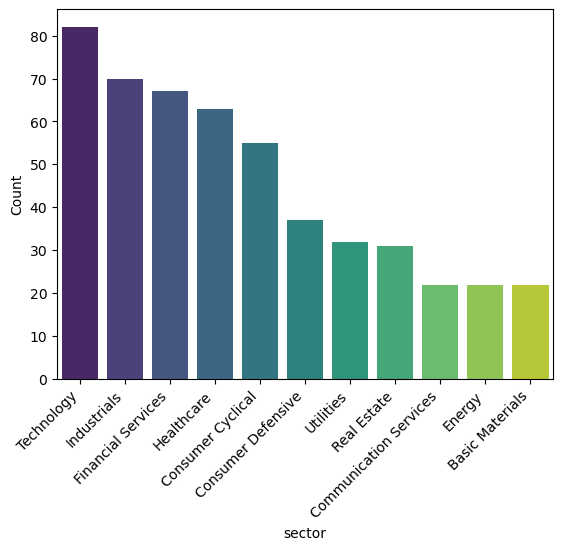

In [46]:
sns.barplot(
    x='sector',
    y='absolute_frequency',
    data=frequency_proportion,
    palette='viridis',
)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The frequency table gives the count of each sector, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories. Such as:
- Technology: 16% 
- Industrials: 14% 
- Financial Services: 13% 
- Healthcare: 12% 
- Consumer Cyclical: 10% 

<h4 style="color: #00BFFF;"> 3.2.2 | Numerical Variables </h4>

In [47]:
definitive['currentprice'].describe()

count     503.000000
mean      230.293300
std       521.997583
min         8.560000
25%        71.545000
50%       126.820000
75%       239.190000
max      8946.330000
Name: currentprice, dtype: float64

**Insights** from Summary Statistics for `currentprice`:

- The average (**mean**) sale price of the stock in the dataset is approximately **$230.29**. This represents the central tendency of the prices.

- The **median** sale price is **$126.82**. Notably, the median is significantly lower than the mean, suggesting that the distribution of stock prices is skewed towards higher values (positively-skewed).

- The **standard deviation**, which measures the variation or spread of prices, is **$521.99**. This large value indicates a high level of variability in stock prices, suggesting that prices are widely dispersed from the mean.

- The **minimum** and **maximum** prices are **$8.56** and **$8946.33**, respectively. This extreme range highlights that the dataset includes stocks with both very low and very high prices.

- The **interquartile range (IQR)**, representing the middle 50% of the prices, lies between $71.54 (Q1) and $239.19 (Q3). This means that 50% of the stock prices fall within this range, providing a clearer picture of the typical stock price distribution without being influenced by outliers.

**Additional Note:**
The significant difference between the mean and median, combined with the large standard deviation, suggests the presence of outliers or high-value stocks that push the mean upwards. This highlights the importance of focusing on the IQR for understanding the core stock price range.

In [48]:
definitive.currentprice.skew().round(2)

11.81

In [49]:

definitive.currentprice.kurtosis().round(2)

174.88

(0.0, 2100.0)

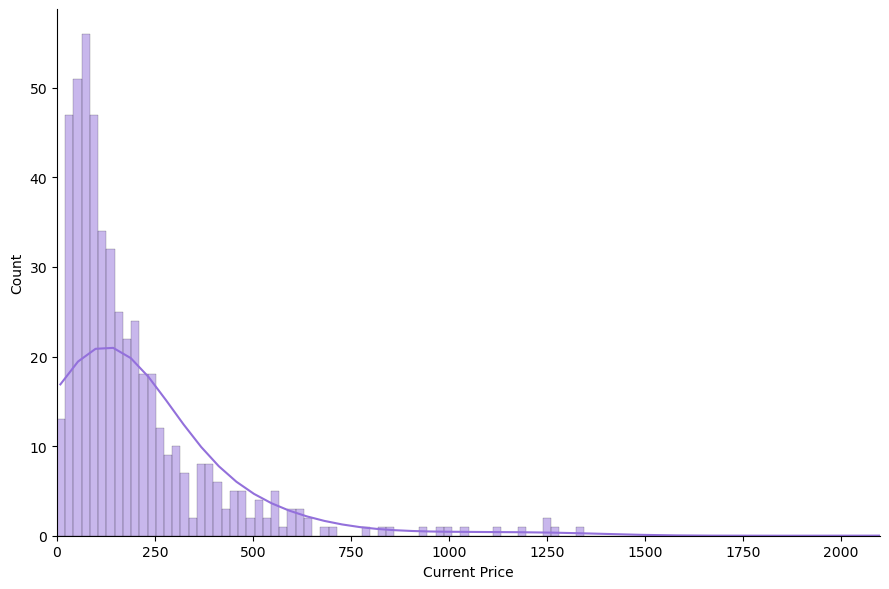

In [50]:
d2 = sns.displot(data=definitive, x='currentprice', kde=True, height=6, aspect=1.5, bins=100, binrange=(0, 2100), color='mediumpurple')
d2.set(xlabel='Current Price')
plt.xlim(0, 2100)

- Skewness of `currentprice`: \(11.81\)
- Kurtosis of `currentprice`: \(174.88\)

**Insights**:

1. **Skewness**: The positive value of skewness 11.81 for the 'currentprice' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of stocks that have higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 174.88 indicates that the 'currentprice' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'currentprice' than one would expect in a normally distributed set.

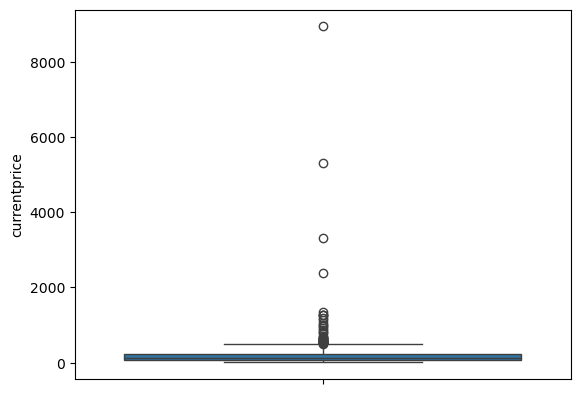

In [51]:
sns.boxplot(data=num.currentprice)
plt.show()

In [52]:
higher_price = definitive.sort_values(by='currentprice', ascending=False)
higher_price.head(4)

,symbol,shortname,sector,industry,marketcap,ebitda,revenuegrowth,city,state,country,...,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
314,NVR,"NVR, Inc.",Consumer Cyclical,Residential Construction,27410481152,2.071504e+09,0.060,Reston,VA,United States,...,0.0729,1.1262,-0.3096,0.5732,0.0922,0.4624,-0.1988,0.5254,0.2837,8946.33
55,BKNG,Booking Holdings Inc. Common St,Consumer Cyclical,Travel Services,175423750144,7.183000e+09,0.089,Norwalk,CT,United States,...,0.1772,0.1761,-0.0349,0.1929,0.0736,0.1087,-0.1813,0.7455,0.5338,5300.34
185,AZO,"AutoZone, Inc.",Consumer Cyclical,Specialty Retail,55943766016,4.338463e+09,0.090,Memphis,TN,United States,...,0.0738,-0.1012,0.1382,0.4208,-0.0036,0.7760,0.2059,0.0636,0.2885,3309.44
180,FICO,Fair Isaac Corporation,Technology,Software - Application,57749082112,7.474560e+08,0.164,Bozeman,MT,United States,...,0.2820,0.2751,0.2191,1.0199,0.3346,-0.1417,0.3508,0.9689,1.0968,2371.83


The box plot for 'currentprice' reveals 4 outstanding outliers that significantly exceed the upper range of typical values. These outliers are stock prices that are far above the third quartile (Q3), suggesting that while most prices fall within a relatively normal range, there are a few extreme high-value stocks.

Outliers are detected as values that lie beyond 1.5 times the interquartile range (IQR) above Q3. These extreme values can impact the overall analysis, particularly the mean and standard deviation, causing them to shift upwards.

- NVR, Inc: $8946.33

- Booking Holdings Inc.: $5300.34

- AutoZone Inc. :$3309.44

- Fair Isaac Corporation: $2371.83 


<h4 style="color: #00BFFF;"> 3.2.3 | Numerical vs Categorical Variables </h4>

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_9778/4204257818.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="shortname", y="sector", data=sector_breakdown, palette=('coolwarm'))
/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_9778/4204257818.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="marketcap", y="sector", data=sector_breakdown, palette=('Wistia'))
/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_9778/4204257818.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="

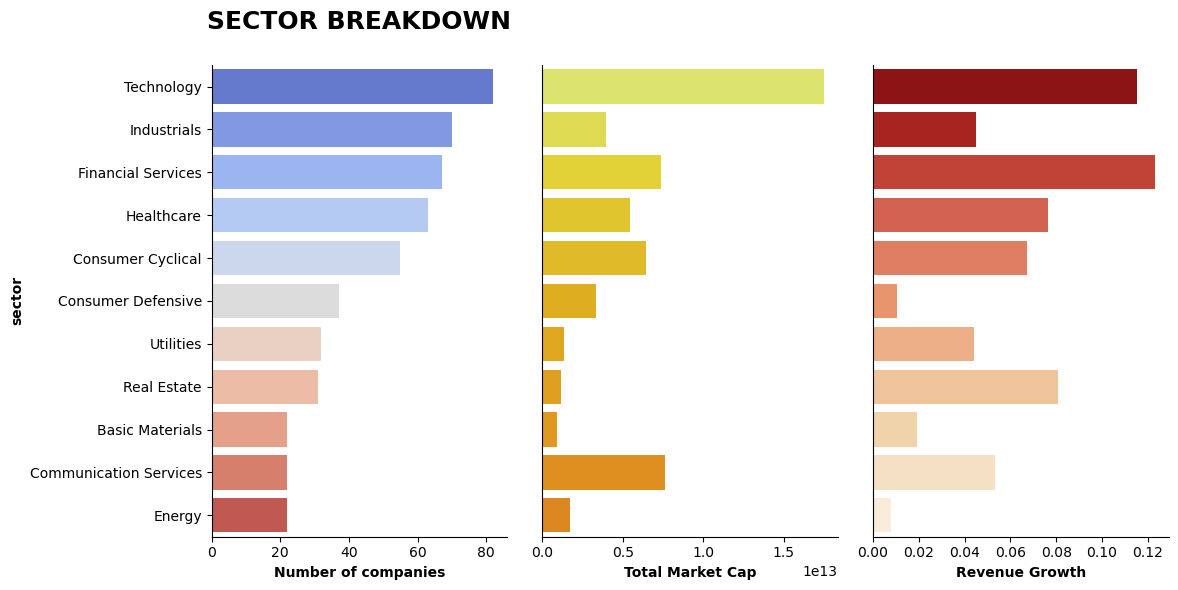

In [53]:
# Found out in Kaggle related notebooks. 
f = {'revenuegrowth':['mean'], 'marketcap':['sum'], 'shortname':['count']}

sector_breakdown = definitive.groupby('sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('shortname', ascending=False)

fig = plt.figure(num=None, figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="shortname", y="sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="marketcap", y="sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="revenuegrowth", y="sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

### Which is the leading sector in S&P 500: 

Observations: 

- The **Technology** sector stands out in the number of companie (**82**) and total market cap (**$213,276,568,488.59**). 
- On the other hand, **Financial Services** sector has the stocks with the most Revenue Growth (**0.12**). 
- The **Energy** sector has the least Number of companies (**22**) and Revenue Growth (**0.01**). 

The formula for revenue growth is given by $$ \text{Revenue Growth} = \frac{\text{Revenue}_{\text{current}} - \text{Revenue}_{\text{previous}}}{\text{Revenue}_{\text{previous}}} \times 100 $$.


In [54]:
#Help from thisp part to display the market cap. 
pd.set_option('display.float_format', '{:.2f}'.format)

In [55]:
market_bysector = definitive.groupby("sector")[["marketcap", "revenuegrowth"]].mean()
market_bysector.reset_index()

,sector,marketcap,revenuegrowth
0,Basic Materials,42360165096.73,0.02
1,Communication Services,345275356509.09,0.05
2,Consumer Cyclical,117143296921.60,0.07
3,Consumer Defensive,90846742721.73,0.01
4,Energy,78567844305.45,0.01
5,Financial Services,110265146421.49,0.12
6,Healthcare,86481132357.08,0.08
7,Industrials,56578773430.86,0.05
8,Real Estate,37602854713.81,0.08
9,Technology,213276568488.59,0.12


/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_9778/3863191171.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=definitive, x='sector', y='revenuegrowth', palette='viridis')


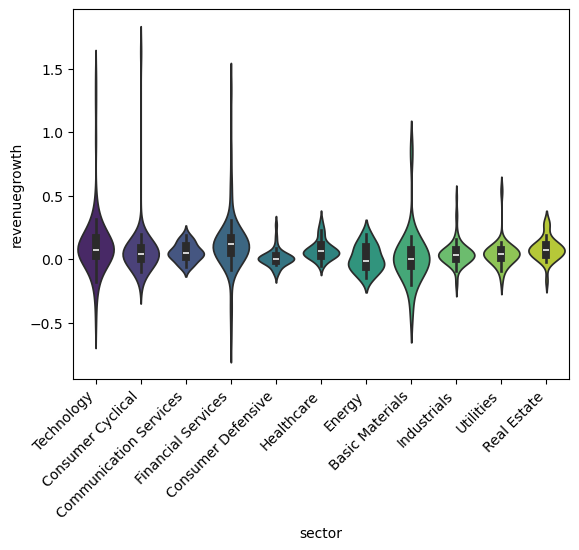

In [56]:
sns.violinplot(data=definitive, x='sector', y='revenuegrowth', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

In [57]:
annual_returns = definitive.groupby('sector')[['ar_2015', 'ar_2016', 'ar_2017','ar_2018', 'ar_2019', 'ar_2020','ar_2021','ar_2022','ar_2023','ar_2024' ]].agg(['mean']).round(4)
annual_returns

,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
sector,,,,,,,,,,
Basic Materials,-0.05,0.33,0.26,-0.15,0.24,0.22,0.39,-0.06,0.10,0.01
Communication Services,0.17,0.19,0.27,-0.05,0.29,0.20,0.15,-0.30,0.27,0.28
Consumer Cyclical,0.12,0.12,0.32,-0.05,0.33,0.27,0.30,-0.19,0.31,0.22
Consumer Defensive,0.14,0.08,0.15,-0.05,0.30,0.13,0.17,0.03,-0.05,0.04
Energy,-0.20,0.44,0.02,-0.20,0.11,-0.28,0.62,0.55,0.07,0.19
Financial Services,0.03,0.23,0.24,-0.09,0.37,0.06,0.36,-0.08,0.13,0.33
Healthcare,0.11,0.06,0.28,0.06,0.31,0.29,0.28,-0.06,0.04,0.01
Industrials,-0.01,0.28,0.29,-0.10,0.39,0.22,0.31,-0.08,0.27,0.28


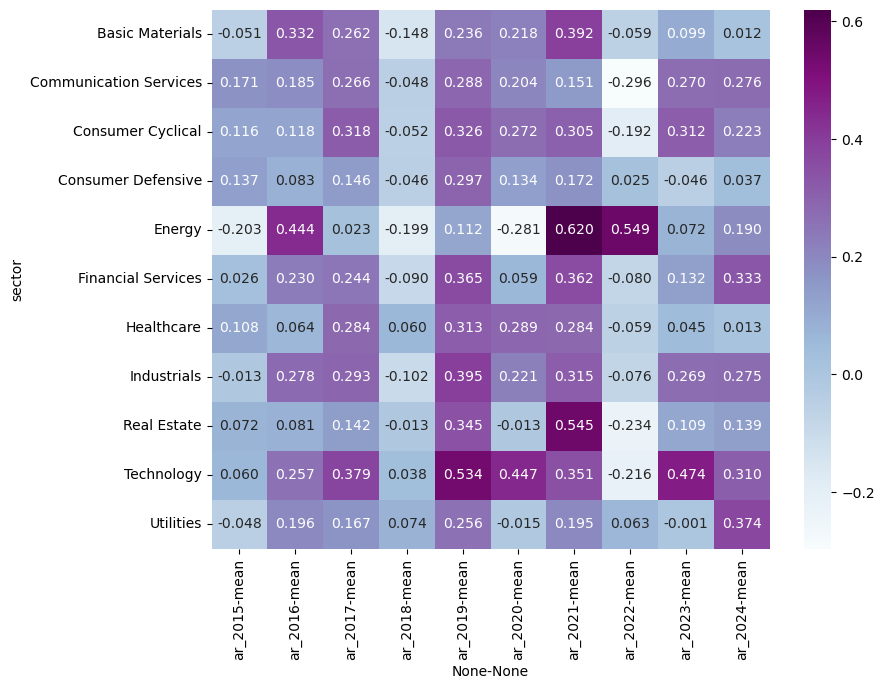

In [58]:
plt.figure(figsize=(9, 7)) 
sns.heatmap(annual_returns, annot=True, cmap="BuPu", fmt=".3f")
plt.show()

### Annual Return sector in S&P 500: 

Calculated the annual return for each sector from 2015 to 2014, analyzing the performance trends across different industries over time.
Observations: 

- The **Energy** sector stands out in 2021 being the highest annual return (0.62). 
- On the other hand, **Technology** sector has the most recurrent annual return over time. 

<h4 style="color: #00BFFF;"> 3.2.4 | Continuous vs Continuous Variables </h4>

In [59]:
sorted_df = defi.sort_values(by=2024, ascending=False)
sorted_df = sorted_df.reset_index()
sorted_df.columns.name = None
sorted_df.head(3)

,symbol,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,PLTR,NaN,NaN,NaN,NaN,NaN,1.48,-0.22,-0.65,1.69,3.60
1,VST,NaN,0.17,0.19,0.24,0.05,-0.11,0.23,0.05,0.78,3.24
2,NVDA,0.66,2.33,0.90,-0.33,0.73,1.18,1.24,-0.51,2.46,1.96


In [60]:
# Sampling with. 
sample_symbols = ['AMZN','PEP','NKE','SP500']
sample_df = sorted_df[sorted_df['symbol'].isin(sample_symbols)]
# Sampling with. 
sample_symbols1 = ['MSFT','PEP','NKE','SP500','JPM']
sample_df1 = sorted_df[sorted_df['symbol'].isin(sample_symbols1)]
# Sampling with. 
sample_symbols2 = ['AAPL','MA','WBA','MAR','PEP','SP500','JPM']
sample_df2 = sorted_df[sorted_df['symbol'].isin(sample_symbols2)]

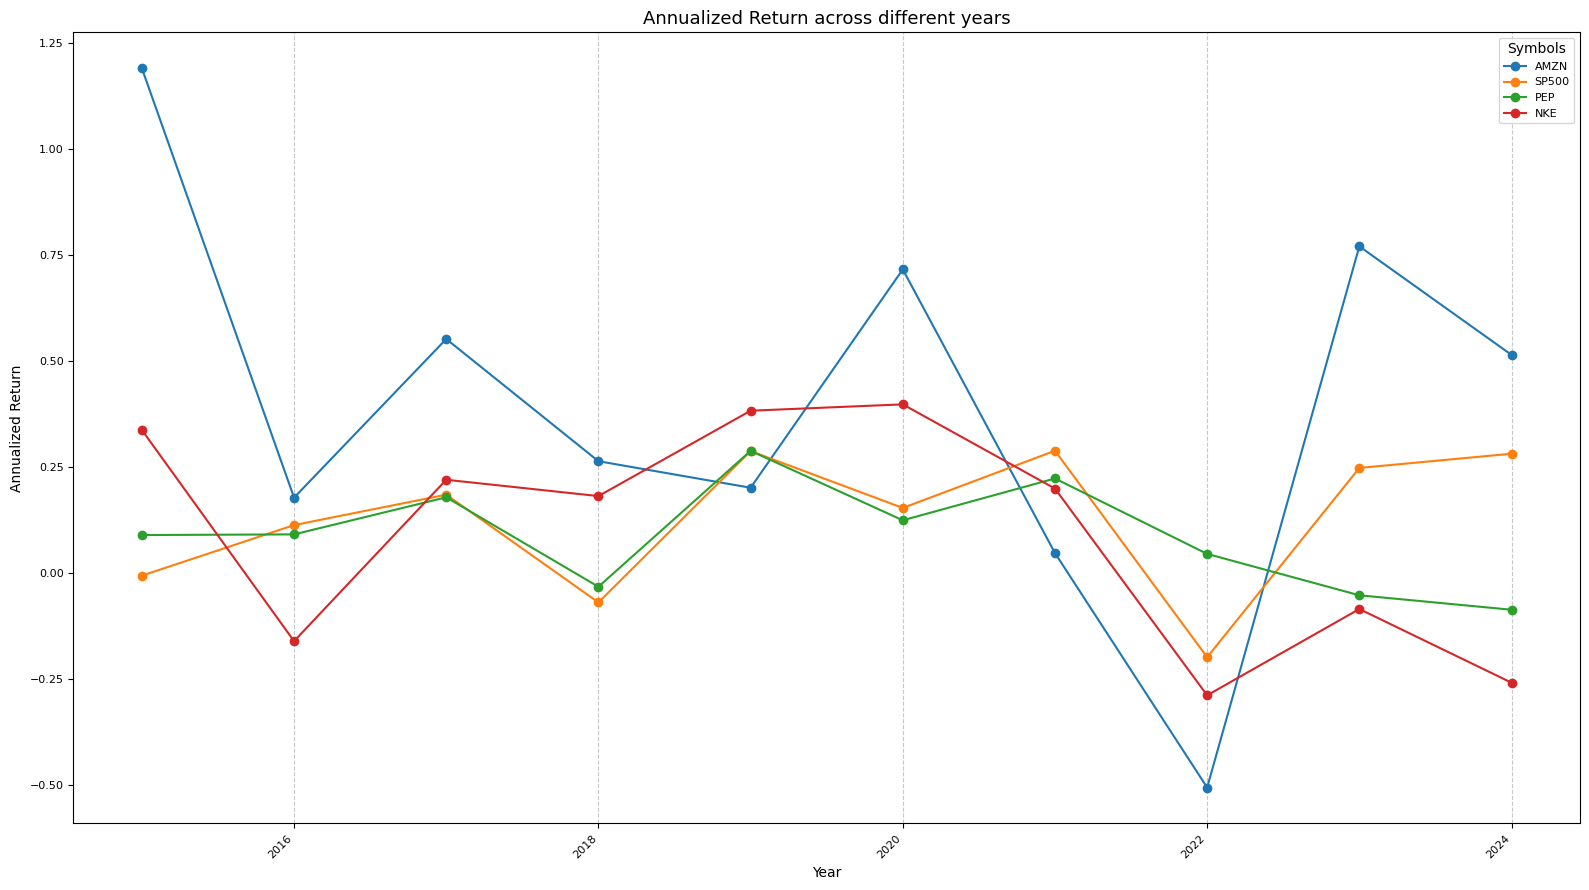

In [61]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return across different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


### Annual Return Stocks vs S&P 500:
Observations:

- Annual Returns Trends:
    - AMZN (Blue line):
        - Highly volatile with significant spikes and drops.
        - Shows exceptionally high returns in 2015 (normalized value above 1.2), followed by a steep decline in 2016.
        - Another sharp rise in 2021 and a dramatic drop in 2022 before partial recovery in 2023-2024.     
    - SP500 (Orange line):
        - Exhibits a more stable trend with moderate fluctuations.
        - Despite a dip in 2022, it recovered quickly in 2023 and 2024, showcasing resilience.
    - PEP (Green line):
        - Relatively stable with smaller peaks and troughs compared to AMZN.
        - Shows a mild declining trend between 2020 and 2024.
    - NKE (Red line):
        - Demonstrates moderate volatility, with notable performance drops in 2016, 2022, and 2024.
        - Shows moderate peaks in 2019 and 2020.
        
- Notable Declines in 2022:
    - All four stocks experience significant drops in 2022, aligning with potential broader market downturns (e.g., rising interest rates, inflation, global economic challenges).
    - AMZN particularly stands out with the steepest decline during this year.

- Recovery Patterns:
    - SP500 recovers faster after the 2022 decline, highlighting its stability and market-wide resilience.
    - AMZN shows a strong rebound in 2023, though still volatile.
    - PEP and NKE do not recover as strongly, with NKE continuing to decline in 2024.

- Volatility and Stability:
    - AMZN exhibits the highest volatility, with extreme peaks and troughs across the timeline.
    - PEP and SP500 appear more stable, showing smoother and less erratic changes year-over-year.
    - NKE falls in the middle, with moderate fluctuations.

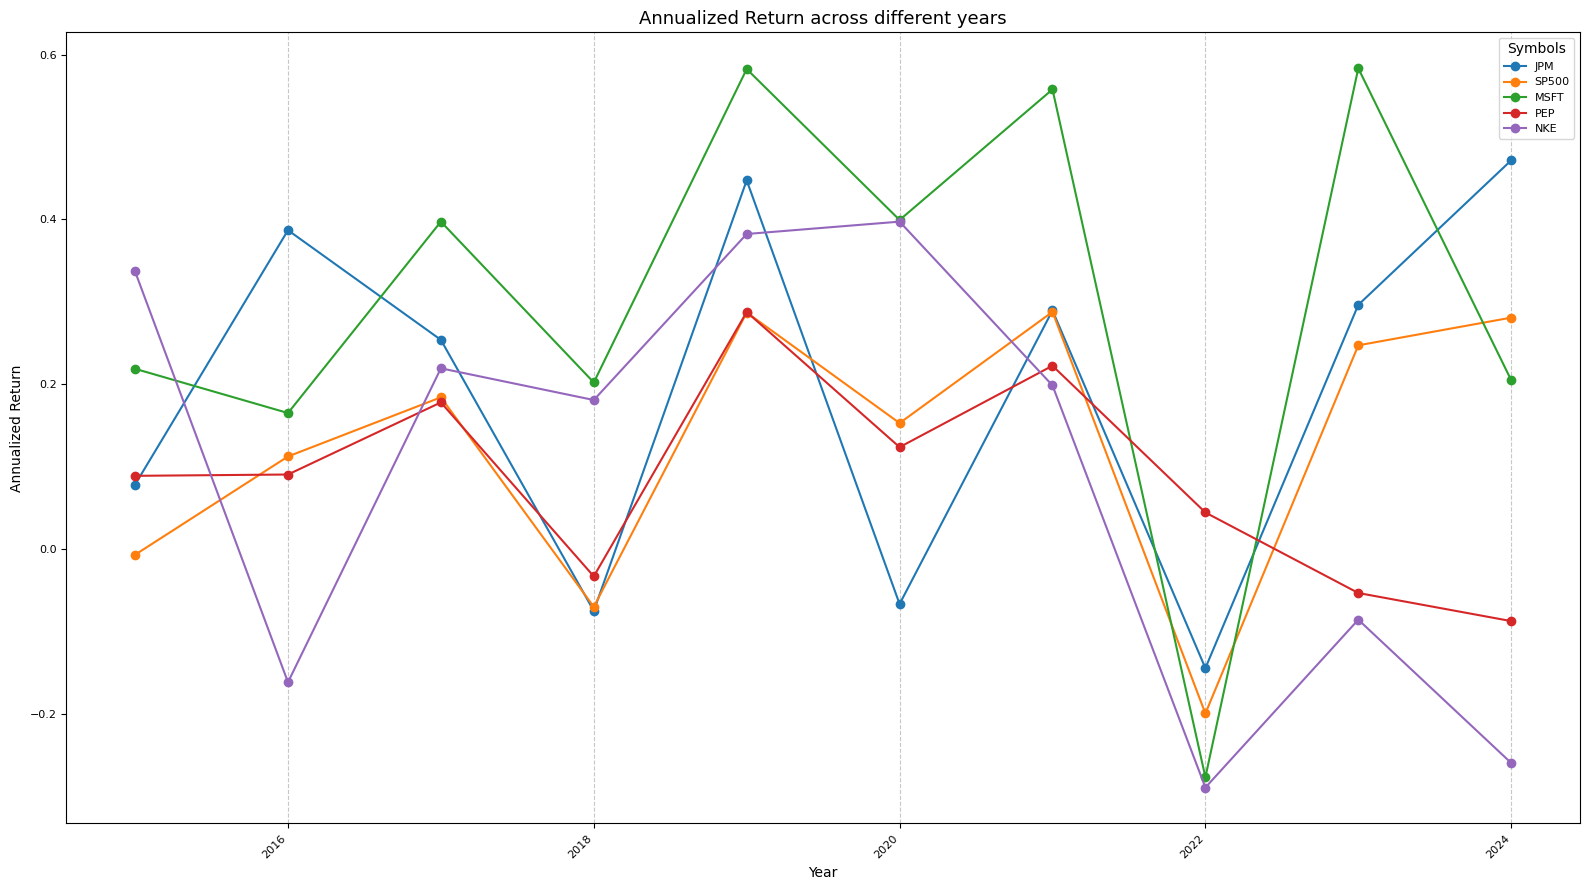

In [62]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df1.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


### Annual Return Stocks vs S&P 500:
Obesrvations
- Annual Returns Trends:
    - JPM (Blue Line):
        - Moderate fluctuations.
        - Sharp decline in 2020 and 2022, followed by a strong recovery in 2023-2024.
    - SP500 (Orange Line):
        - Shows stable, gradual growth.
        - Significant dip in 2022, but quickly recovers in 2023-2024.
    - MSFT (Green Line):
        - Strong upward spikes in 2019, 2021, and 2023.
        - Steep drop in 2022, followed by a strong rebound in 2023.
    - PEP (Red Line):
        - Consistent and stable with small fluctuations.
        - Gradual decline starting in 2020, with a flat trend in 2023-2024.
    - NKE (Purple Line):
        - Highly volatile, with big drops in 2016, 2022, and 2024.
        - Peaks in 2015, 2019, and 2021, showing inconsistency.
- 2022 Market-Wide Drop:
    - All stocks, including the SP500, declined sharply in 2022, likely reflecting broader market issues.
- Recovery Patterns:
    - JPM, MSFT, and SP500 showed strong rebounds after the 2022 drop.
    - PEP and NKE have struggled to recover, with NKE continuing downward.

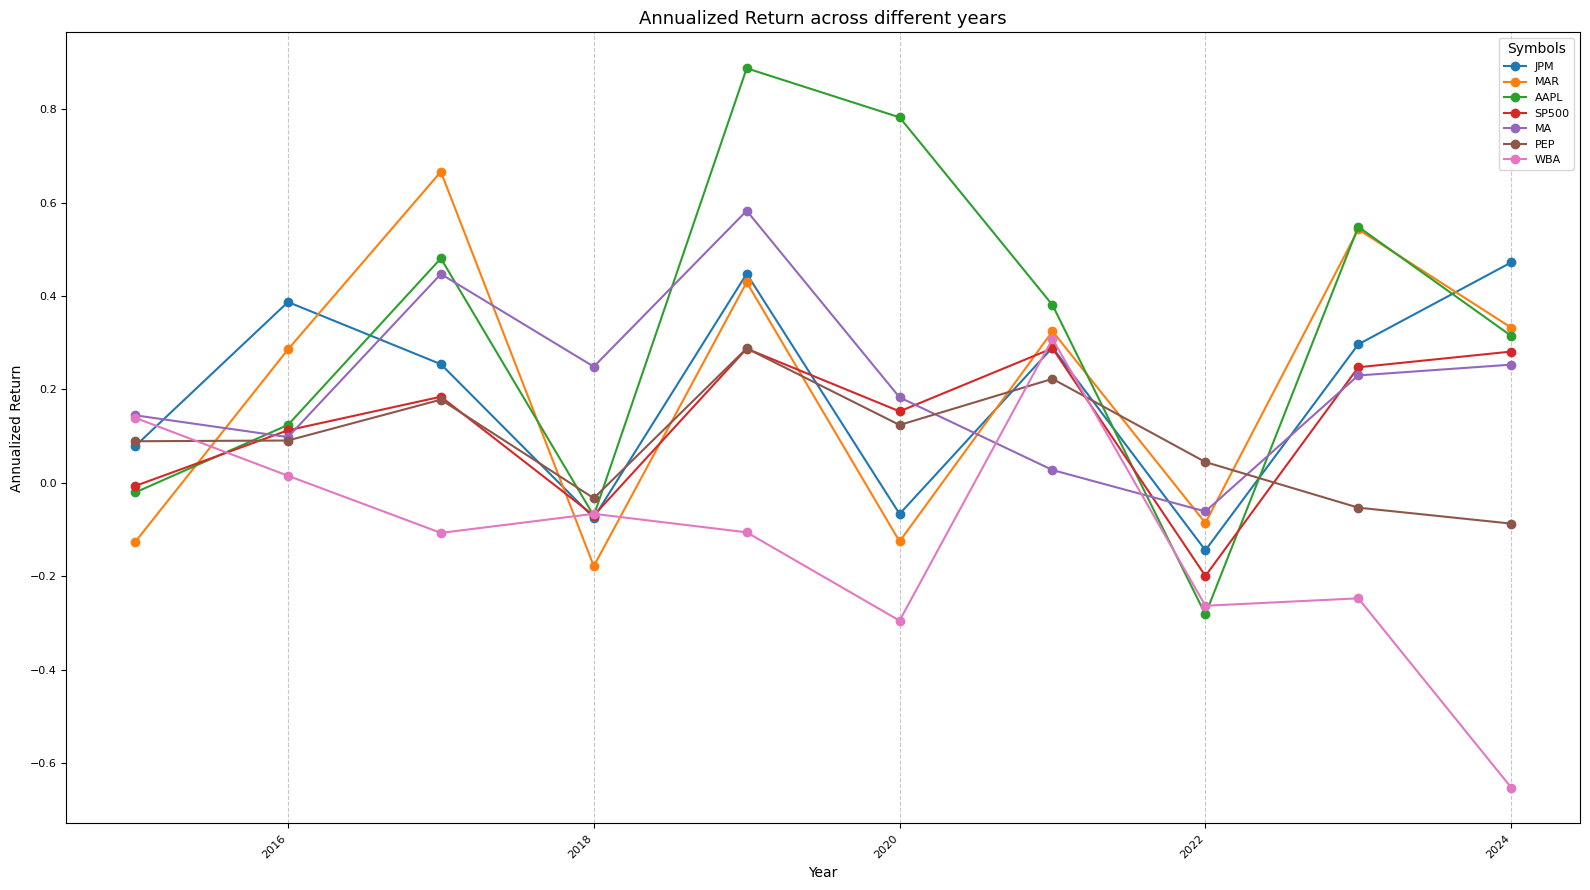

In [63]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df2.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()

### Annual Return Stocks vs S&P 500:

Observations:
- Annual Returns Drop (2020 and 2022):
    - The overall market experienced a significant drop in annual returns in 2020 and 2022, visible across multiple stock lines.
    - This could indicate broader economic or market-wide downturns during those years (e.g., COVID-19 in 2020 and other macroeconomic factors in 2022).

- Stock-Specific Trends:
    - AAPL (green line):
        - Exhibits substantial growth leading up to 2020 but shows a steep decline in 2020 and recovers strongly afterward.
        - A significant upward spike is also visible in 2021, outperforming other stocks.    
    - WBA (pink line):
        - Underperforms most other stocks, consistently showing negative or near-zero returns after 2018, particularly in 2023, where the decline is steepest.
    - SP500 (orange line):
        - Follows the overall market trend but tends to recover quickly after declines.
    - PEP (purple line) and MA (brown line):
        - Show relatively stable and less volatile performance compared to other stocks.

- Volatility Analysis:
    - The plot highlights a high degree of volatility for certain stocks (e.g., AAPL and SP500), with notable peaks and troughs over the years.
    - Comparatively, stocks like MA (brown) show more consistent behavior, with less dramatic swings.
    
- Recovery Post-2020:
    - After the 2020 downturn, stocks like JPM (blue line), AAPL, and SP500 demonstrate strong rebounds, indicating resilience in their returns.

- Recent Years (2023-2024):
    - WBA (pink line) continues to perform poorly, declining sharply.
    - Most other stocks (e.g., JPM, AAPL, and SP500) stabilize or show slight positive returns in 2024, suggesting a potential recovery trend.

<h3 style="color: #4169E1;"> 3.3 | Checking Distributions</h3>

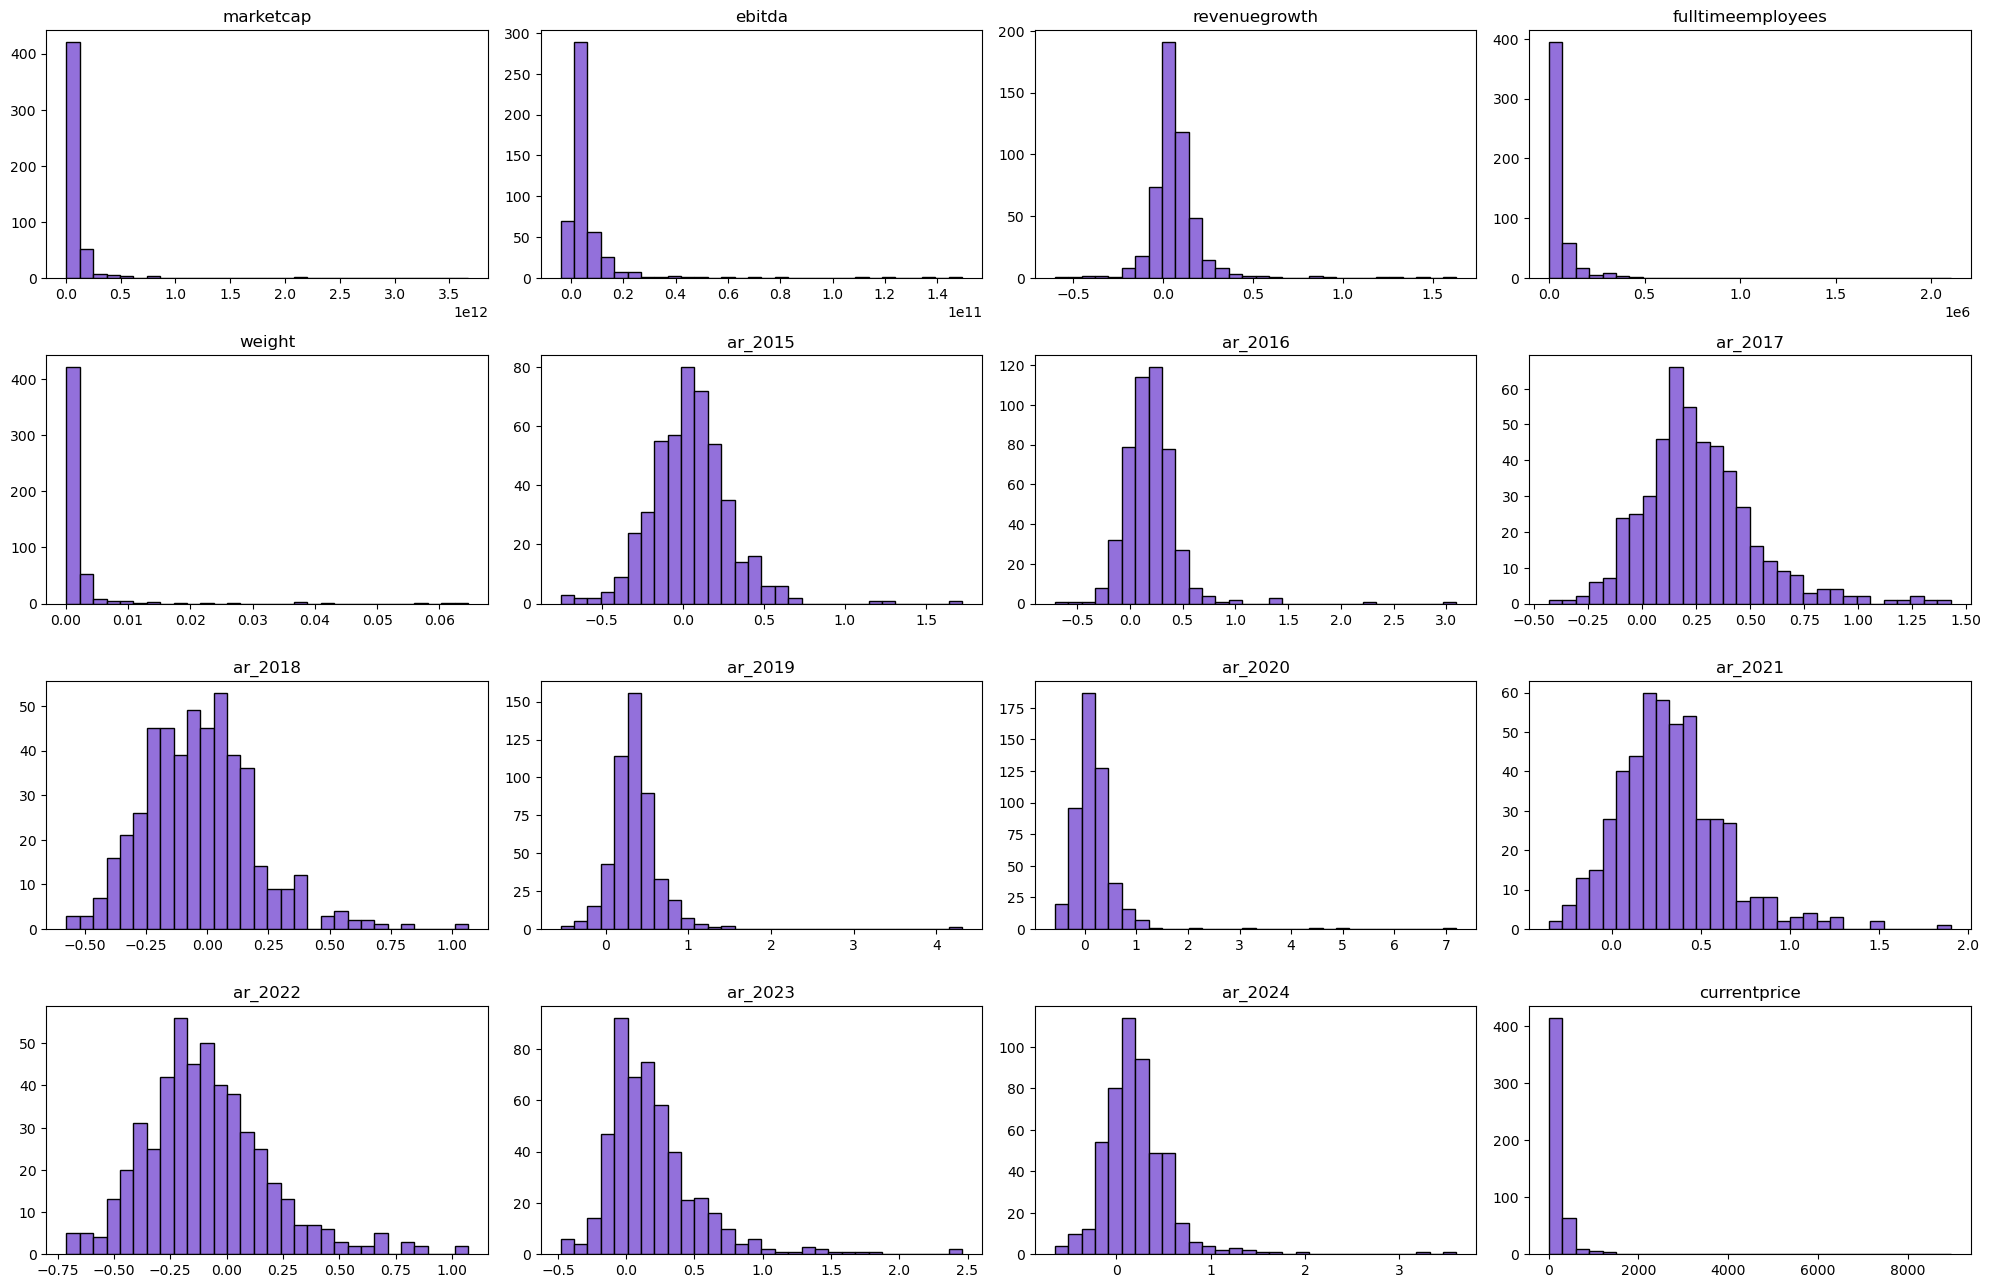

In [64]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #4169E1;"> 3.4 | Checking our target distribution</h3>

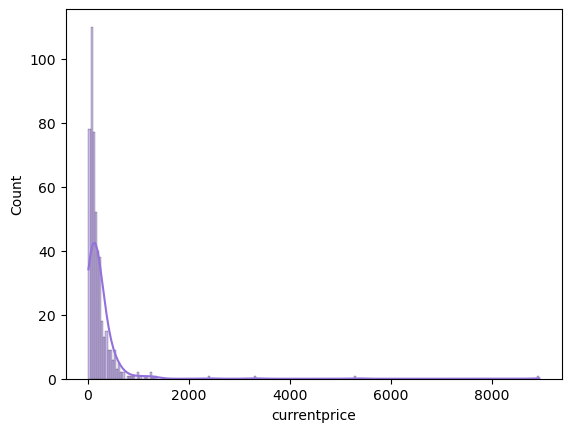

In [65]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(definitive["currentprice"], color=color, kde=True);

<h3 style="color: #4169E1;">3.5 | Looking for Correlations </h3>

In [66]:
# Calculating the Pearson correlation coefficient between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'])

0.04237468586938245

In [67]:
# Calculating the Spearman rank correlation between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'], method='spearman')

0.27194339850446614

- Pearson Correlation: \(0.0423\)
- Spearman Correlation: \(0.2741\)

**Insights:**

- The **Pearson correlation** of \(0.0423\) suggests a very weak positive linear relationship between currentprice and revenuegrowth. As revenuegrowth increases, currentprice does not show a strong linear increase.
  
- The **Spearman correlation** of \(0.2741\) indicates a weak positive monotonic relationship. This suggests that while higher revenuegrowth tends to correspond with higher currentprice, the relationship is not strongly linear or constant. 

The slightly higher value for Spearman correlation suggests that there might be some non-linear aspects to their relationship or the presence of outliers affecting the Pearson correlation.

In [68]:
#pearson 
num.corrwith(definitive['currentprice']).sort_values(ascending=False)

currentprice         1.00
ar_2023              0.16
ar_2017              0.15
ar_2015              0.13
ar_2024              0.11
ar_2019              0.09
ar_2018              0.06
ar_2020              0.04
weight               0.04
marketcap            0.04
revenuegrowth        0.04
ar_2021              0.03
ar_2022              0.02
ebitda               0.01
ar_2016             -0.01
fulltimeemployees   -0.01
dtype: float64

In [69]:
#Spearman
num.corrwith(df['currentprice'], method='spearman').sort_values(ascending=False)[:5]

currentprice   1.00
ar_2023        0.40
marketcap      0.38
weight         0.38
ar_2020        0.33
dtype: float64

Variables like `ar_2023`, `marketcap`, `weight`, and `ar_2020` have moderate positive correlations with `currentprice`, suggesting that as these variables increase, the currentprice tends to increase as well, but the relationship is not strong.

In [70]:
num_corr = num.corr()
num_corr

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
marketcap,1.00,0.85,0.17,0.34,1.00,0.19,0.13,0.14,0.05,0.06,0.19,0.10,-0.12,0.32,0.19,0.04
ebitda,0.85,1.00,0.06,0.40,0.85,0.12,0.04,0.03,0.02,-0.03,0.02,0.05,-0.01,0.15,0.09,0.01
revenuegrowth,0.17,0.06,1.00,-0.01,0.17,0.03,0.15,0.01,0.06,0.05,0.06,0.04,-0.05,0.37,0.29,0.04
fulltimeemployees,0.34,0.40,-0.01,1.00,0.34,0.08,-0.05,0.03,0.01,-0.04,0.02,-0.05,-0.06,0.04,0.05,-0.01
weight,1.00,0.85,0.17,0.34,1.00,0.19,0.13,0.14,0.05,0.06,0.19,0.10,-0.12,0.32,0.19,0.04
ar_2015,0.19,0.12,0.03,0.08,0.19,1.00,-0.18,0.14,0.15,0.01,0.04,-0.07,-0.19,0.11,-0.07,0.13
ar_2016,0.13,0.04,0.15,-0.05,0.13,-0.18,1.00,-0.02,-0.06,0.04,-0.01,0.16,0.01,0.16,0.19,-0.01
ar_2017,0.14,0.03,0.01,0.03,0.14,0.14,-0.02,1.00,0.08,0.31,0.34,-0.05,-0.25,0.23,0.02,0.15
ar_2018,0.05,0.02,0.06,0.01,0.05,0.15,-0.06,0.08,1.00,0.20,0.20,-0.06,-0.09,-0.03,0.04,0.06
ar_2019,0.06,-0.03,0.05,-0.04,0.06,0.01,0.04,0.31,0.20,1.00,0.37,-0.01,-0.18,0.13,-0.03,0.09


Text(0.5, 1.0, 'Correlation Heatmap')

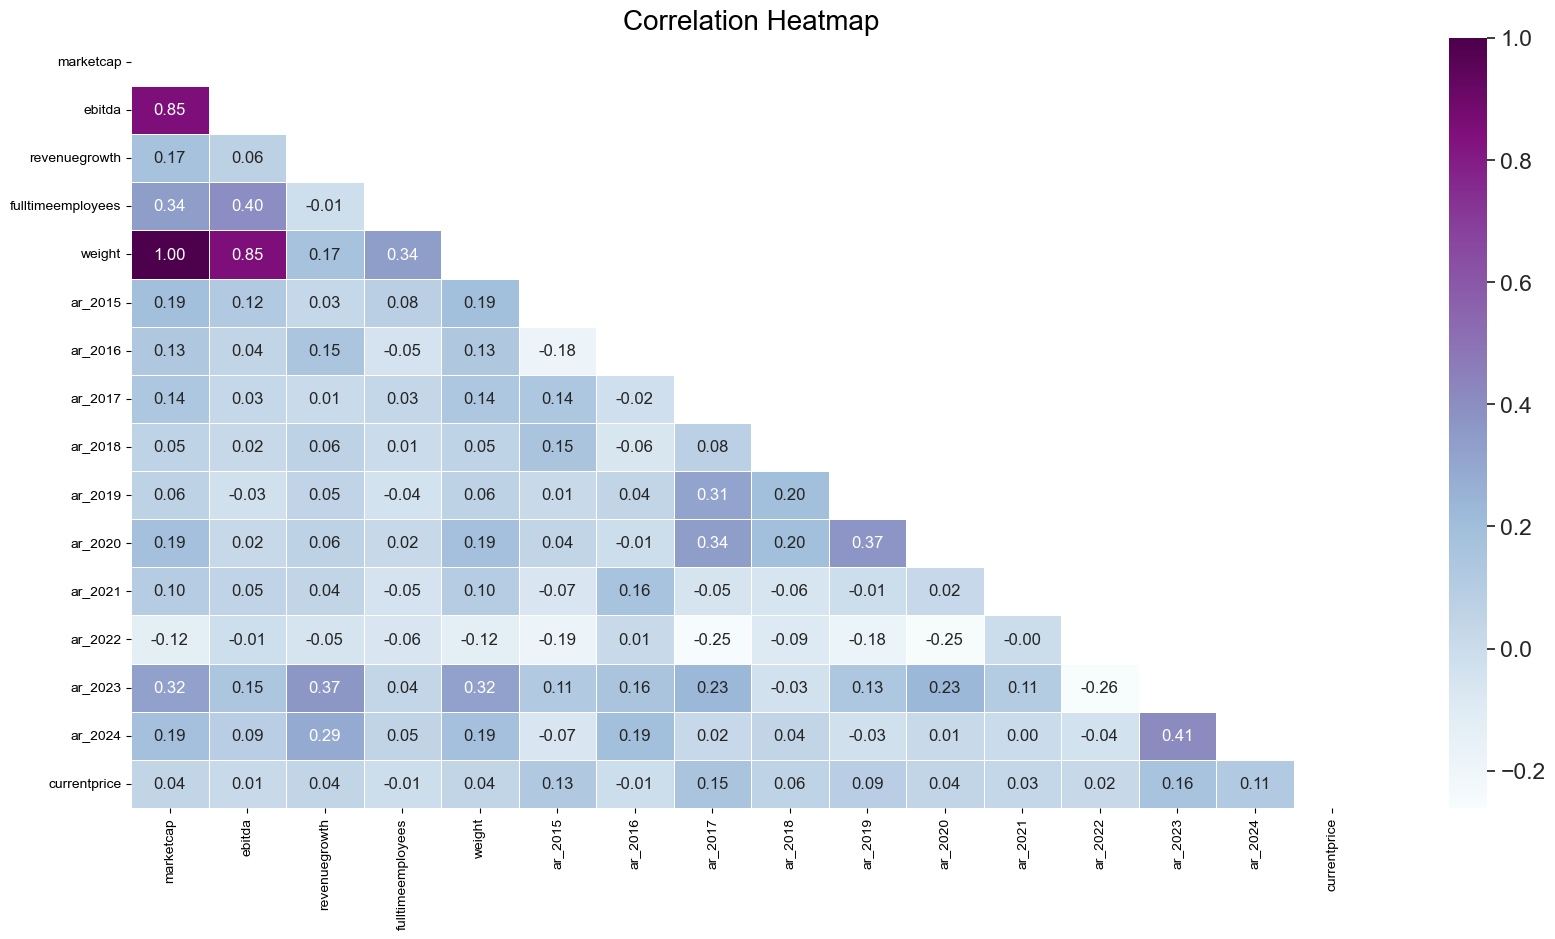

In [71]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

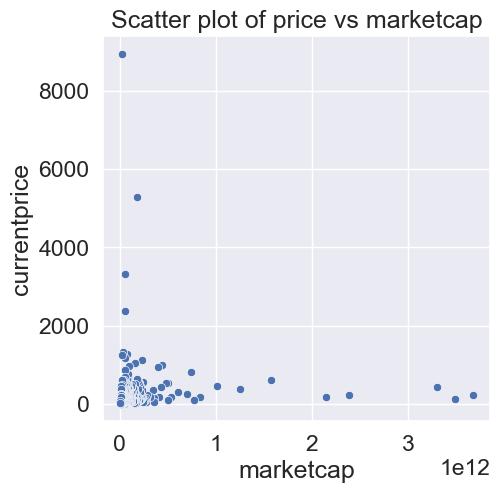

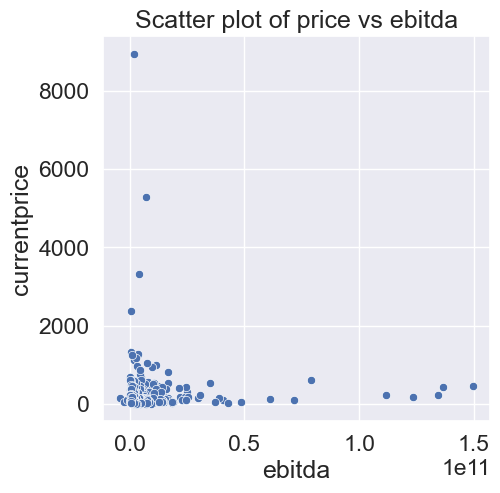

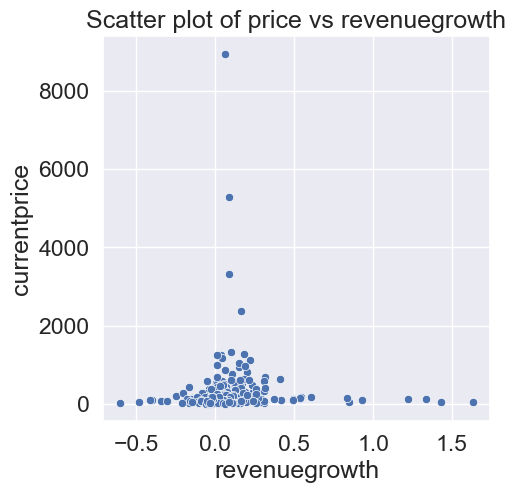

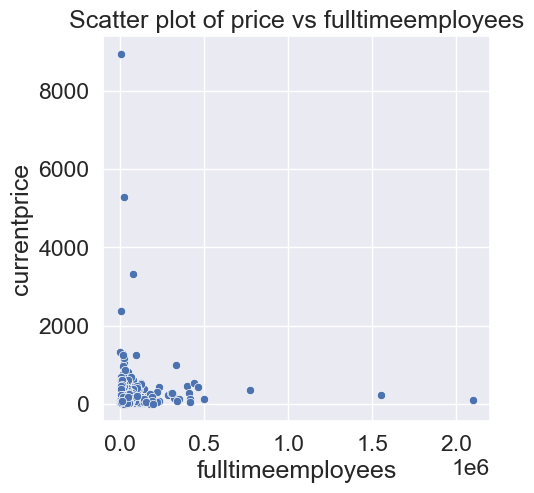

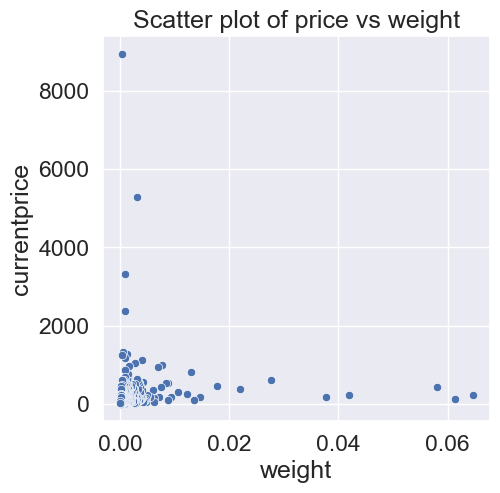

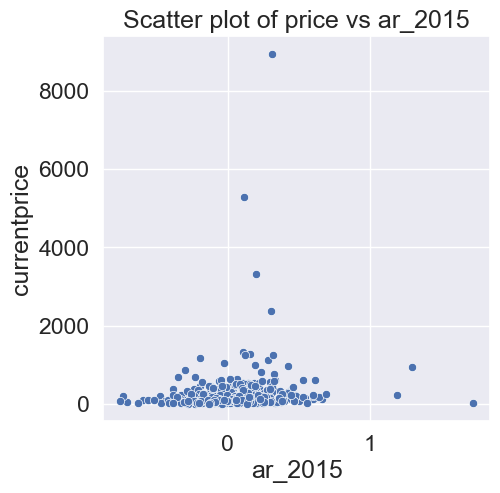

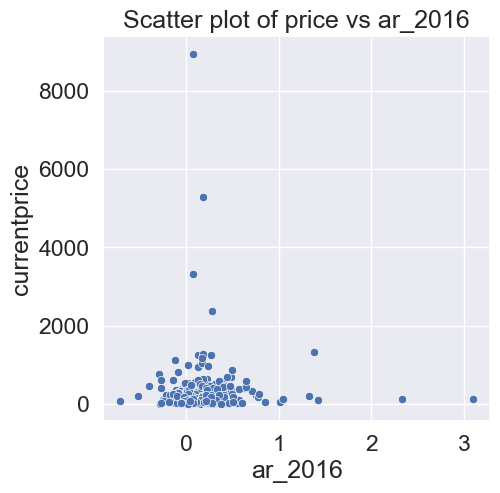

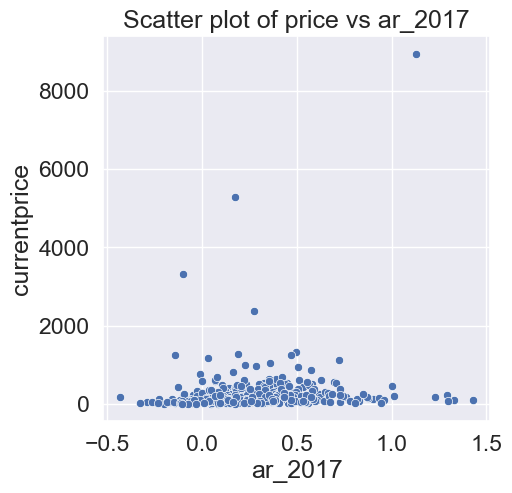

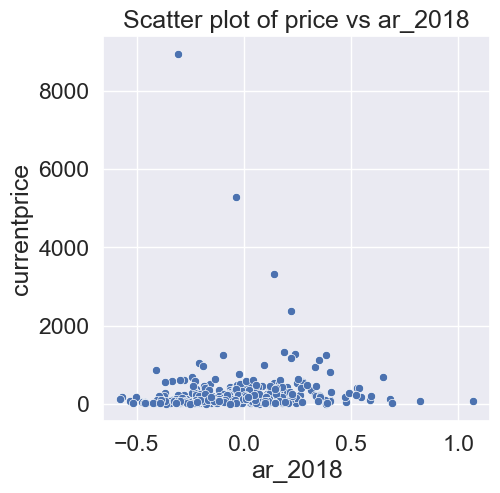

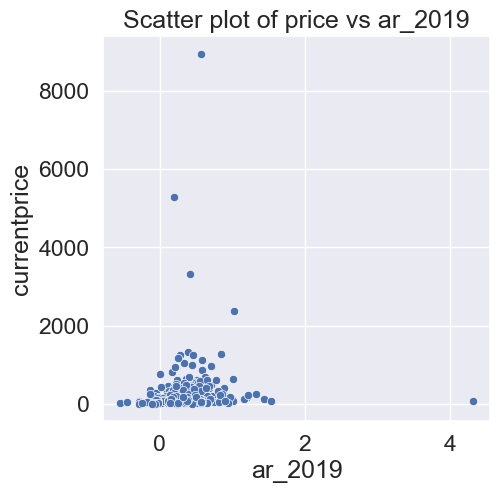

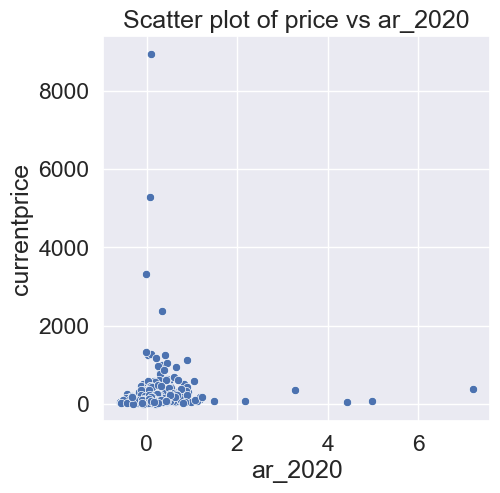

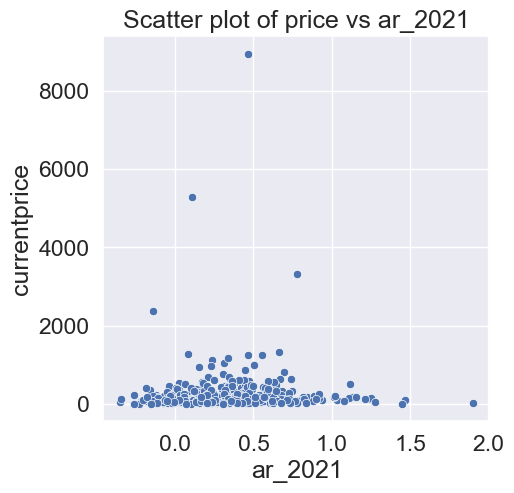

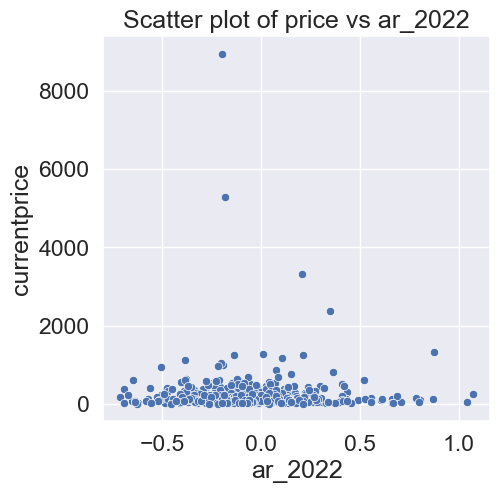

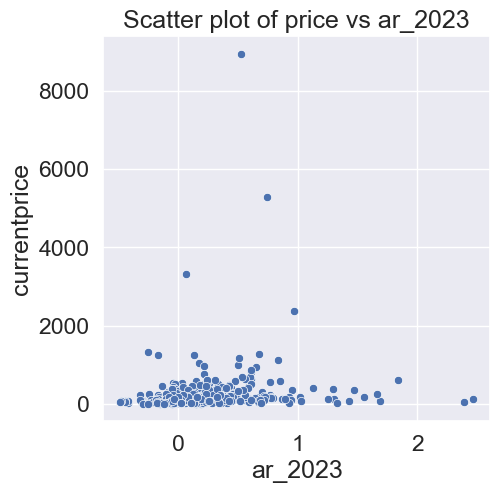

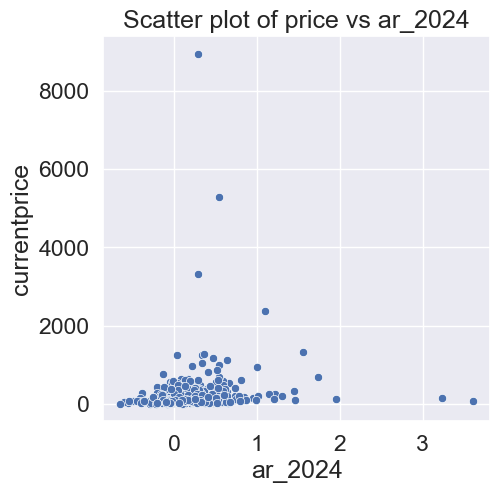

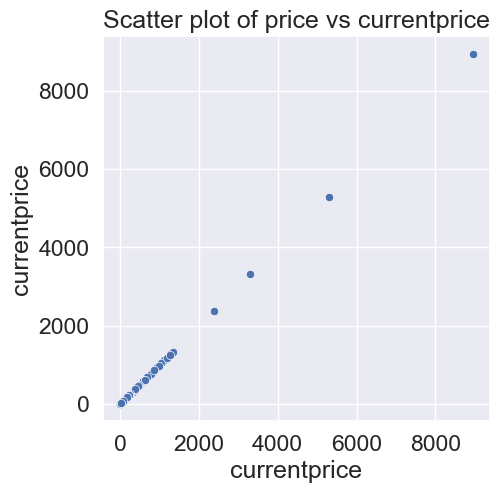

In [72]:
# Plotting scatter plots for each numerical column against 'currentprice' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of price vs ' + col)
    sns.scatterplot(data=definitive, x=col, y='currentprice')
    plt.show()

<h3 style="color: #4169E1;">3.6 | Hypothesis Testing </h3>

We will use **one-way ANOVA** to determine if there is a statistically significant difference in **revenue growth** based on the **sector**.

#### Define Hypotheses
- **Null Hypothesis (H₀)**: There is no difference in mean **revenue growth** between three different sectors **Technology**, **Industrials**, and **Finance Services** companies.
- **Alternative Hypothesis (H₁)**: At least one group mean is different.

In [73]:
# Extract revenuegrowth by sector.
tech_df = definitive[definitive['sector'] == 'Technology']['revenuegrowth']
indus_df = definitive[definitive['sector'] == 'Industrials']['revenuegrowth']
fin_df = definitive[definitive['sector'] == 'Financial Services']['revenuegrowth']

In [74]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(tech_df, indus_df, fin_df)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}") 
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: revenuegrowth has no significant impact on sector.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in revenuegrowth based on the sector.")

F-Statistic: 2.76
P-Value: 0.0655

Fail to Reject the Null Hypothesis: revenuegrowth has no significant impact on sector.
